# Data anaylsis in cerebellar granular layer simulations (GrC-GoC plasticity)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GrCGoCPlasticity/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestGrCGoCPlasticity'
simulation_time = 2000.0
analysis_time = 1.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 1234567
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = False
simulation.config_options['simulation']['state_recording_step'] = 100.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 1.31e-10
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 1.91e-9
simulation.config_options['mfgrcsynapsis']['weight_recording'] = False
simulation.config_options['mfgrcsynapsis']['weight_normalization'] = False
# Set the MF-GoC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 0.00
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 0.00e-9
simulation.config_options['mfgocsynapsis']['weight_recording'] = False
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
# Set the GrC-GoC connectivity rules and parameters
simulation.config_options['grcgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['grcgocsynapsis']['random_min_weight'] = 5.41e-13
simulation.config_options['grcgocsynapsis']['random_max_weight'] = 2.80e-12
simulation.config_options['grcgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['grcgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['grcgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['grcgocsynapsis']['minus_plus_ratio'] = 1.9
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['grcgocsynapsis']['max_weight'] = 1.0e-11
simulation.config_options['grcgocsynapsis']['weight_recording'] = True
simulation.config_options['grcgocsynapsis']['weight_normalization'] = False
#simulation.config_options['grcgocsynapsis']['weight_sum'] = 40.0e-9
# Set the GoC-GrC connectivity rules and parameters
simulation.config_options['gocgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['gocgrcsynapsis']['random_min_weight'] = 0.00
simulation.config_options['gocgrcsynapsis']['random_max_weight'] = 0.00
simulation.config_options['gocgocsynapsis']['weight_recording'] = False
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['gocgocsynapsis']['random_min_weight'] = 0.00
simulation.config_options['gocgocsynapsis']['random_max_weight'] = 0.00
simulation.config_options['gocgocsynapsis']['weight_recording'] = False
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False


Initialize the simulation

In [5]:
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-04-02 00:12:24,418 - P6432 - MemTotal:71M - Simulation - DEBUG: Simulation time fixed to 2000.0s
2018-04-02 00:12:24,445 - P6432 - MemTotal:71M - Simulation - DEBUG: Creating cerebellum generator
2018-04-02 00:12:24,748 - P6432 - MemTotal:88M - Simulation - DEBUG: Initializing cerebellum generator
2018-04-02 00:12:24,750 - P6432 - MemTotal:88M - Simulation - DEBUG: Cerebellar simulation initialized
2018-04-02 00:12:24,758 - P6432 - MemTotal:88M - Simulation - DEBUG: NEST module loaded
2018-04-02 00:12:24,784 - P6432 - MemTotal:91M - Simulation - DEBUG: Setting Global NEST Seed: 1234578
2018-04-02 00:12:24,786 - P6432 - MemTotal:91M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [1234579, 1234580, 1234581, 1234582, 1234583, 1234584, 1234585, 1234586, 1234587, 1234588]
2018-04-02 00:12:24,803 - P6432 - MemTotal:91M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2018-04-02 00:12:24,805 - P6432 - MemTotal:91M - Simula

Visualize the simulation or only run it.

In [6]:
#simulation.visualize_animation()
simulation.run_simulation()

2018-04-02 00:12:33,232 - P6432 - MemTotal:1306M - Simulation - INFO: Running the simulation from 0.0s until time 2000.0s
2018-04-02 00:12:33,255 - P6432 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.062s until 0.062s
2018-04-02 00:12:34,173 - P6432 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.915880203247 seconds. Real-time rate: 0.06769444276685027
2018-04-02 00:12:34,193 - P6432 - MemTotal:1329M - Simulation - DEBUG: Running the simulation 0.404s until 0.466s
2018-04-02 00:12:40,568 - P6432 - MemTotal:1334M - Simulation - DEBUG: Simulation time is 6.37182497978 seconds. Real-time rate: 0.0634041269623535
2018-04-02 00:12:40,588 - P6432 - MemTotal:1334M - Simulation - DEBUG: Running the simulation 0.14399999999999996s until 0.61s
2018-04-02 00:12:42,683 - P6432 - MemTotal:1335M - Simulation - DEBUG: Simulation time is 2.09302186966 seconds. Real-time rate: 0.06880004556446973
2018-04-02 00:12:42,705 - P6432 - MemTotal:1335M - Simulation - DEBUG: Runni

Save the network state after the simulation

In [7]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

## GrC activity analysis

Show the GrC acticity rasterplot

Text(0.5,0,u'GrC Cell Number')

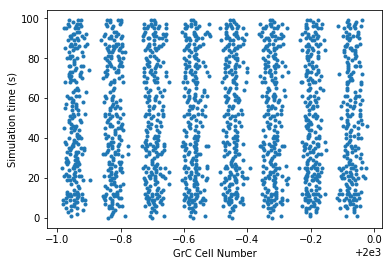

In [8]:
init_time = simulation.current_time - 1.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('Simulation time (s)')
plt.xlabel('GrC Cell Number')

Calculate the average firing frequency of each granular cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.001043134765625 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

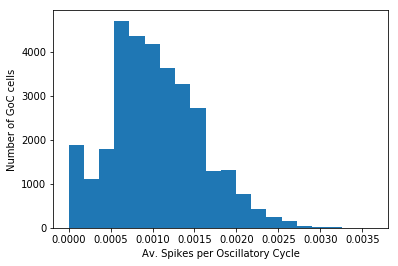

In [9]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GrC

Number of active synapses MF-GrC: 109805
Weight sum histogram MF-GrC: 109805


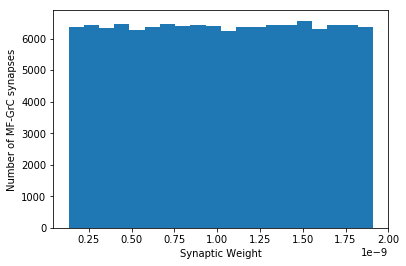

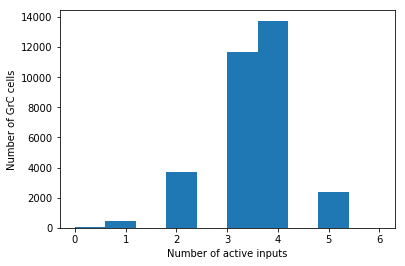

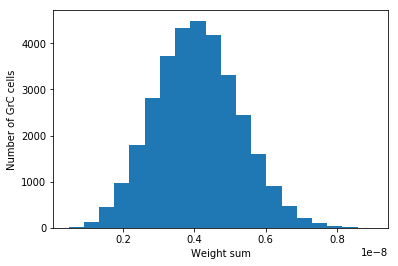

In [10]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Number of MF-GrC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 10883


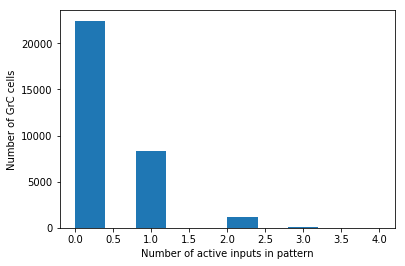

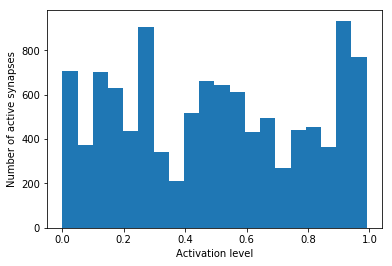

In [11]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active])
    plt.figure()
    plt.hist(number_of_active_inputs_in_pattern, bins=10)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

## GoC activity analysis

Show the GoC acticity rasterplot

Text(0.5,0,u'Simulation time (s)')

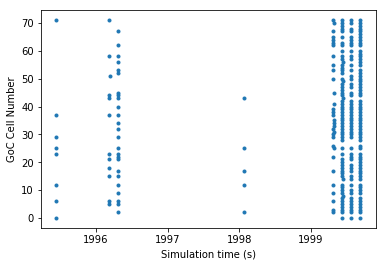

In [12]:
init_time = simulation.current_time - 5.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.1993220486111111 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

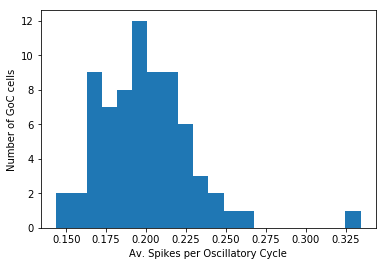

In [13]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between GrC and GoC

Number of active synapses GrC-GoC: 26842
Weight sum histogram GrC-GoC: 26842


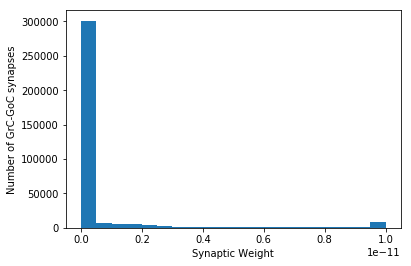

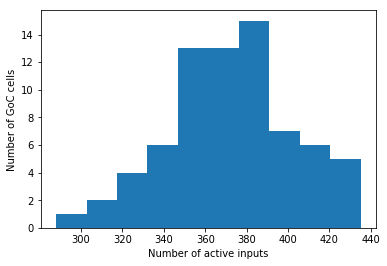

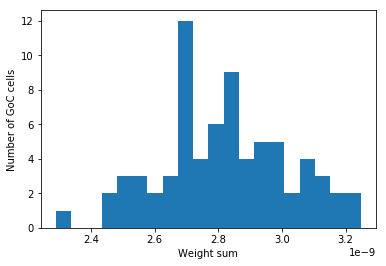

In [14]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,1.0e-11))
plt.ylabel('Number of GrC-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram GrC-GoC:',numpy.count_nonzero(active_synapses)